In [1]:
pip install dtreeviz


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [3]:
zoo=pd.read_csv("/home/exam/Sumanth/zoo.csv")

In [4]:
zoo


,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
X = zoo.drop('1.7', axis=1)  # Features
y = zoo['1.7']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=41)


In [6]:
clf = DecisionTreeClassifier(criterion= "entropy", random_state=41)


In [7]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=41)

In [8]:
y_pred = clf.predict(X_test)


In [9]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.95
Confusion Matrix:
[[14  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  2  1]
 [ 0  0  0  0  0  0  1]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         8
           5       1.00      0.50      0.67         2
           6       1.00      0.67      0.80         3
           7       0.50      1.00      0.67         1

    accuracy                           0.95        40
   macro avg       0.88      0.88      0.85        40
weighted avg       0.97      0.95      0.95        40



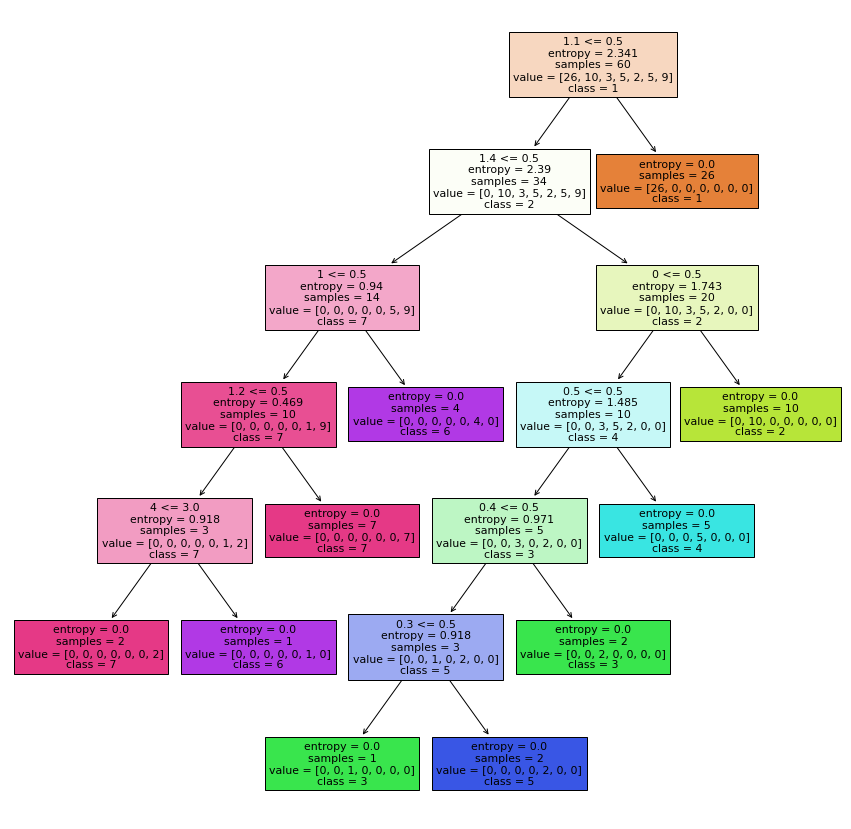

In [10]:
plt.figure(figsize=(15, 15))
plot_tree(clf, feature_names=X.columns, class_names=list(map(str, clf.classes_)), filled=True)
plt.show()
